#Praktikum 1

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Penjelasan :

melakukan Mount drve

In [3]:
import numpy as np
import pandas as pd

#baca data
data = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Penjelasan :

Melakukan pengambilan data dari google drive dan menampilkan 5 data teratas

In [4]:
#melihat data awal
data.head()
#mengcek ukuran data
data.shape
#informasi tentang data
data.info()
#deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Penjelasan :

pada tahapan ini melakukan identifikasi pada data yang akan di olah mulai dari isi data, ukuran data, informasi tentang data, dan deskripsi data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Penjelasan :

Melakukan import library matplot dan seaborn

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


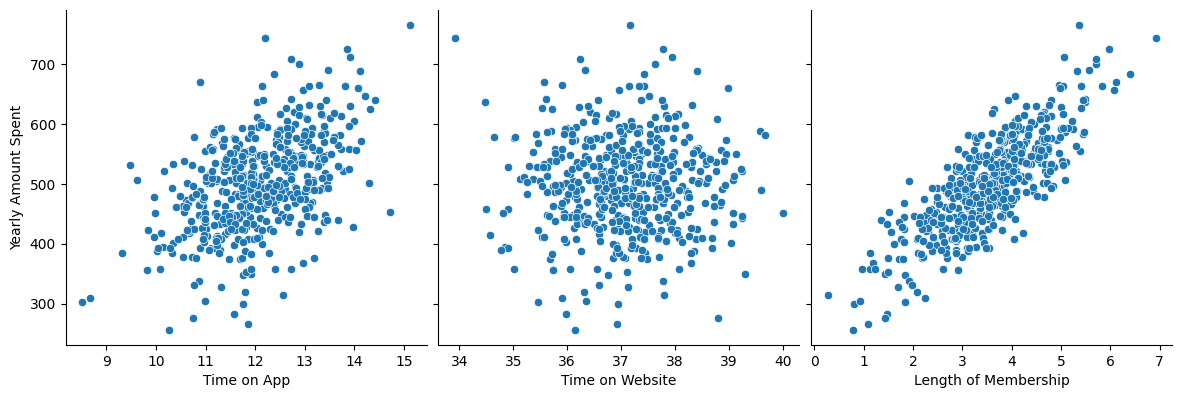

In [6]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Penjelasan :

Melakukan visualisasi data yearly amount spent at time on app, time on website, lenght of mambership dengan pairplot

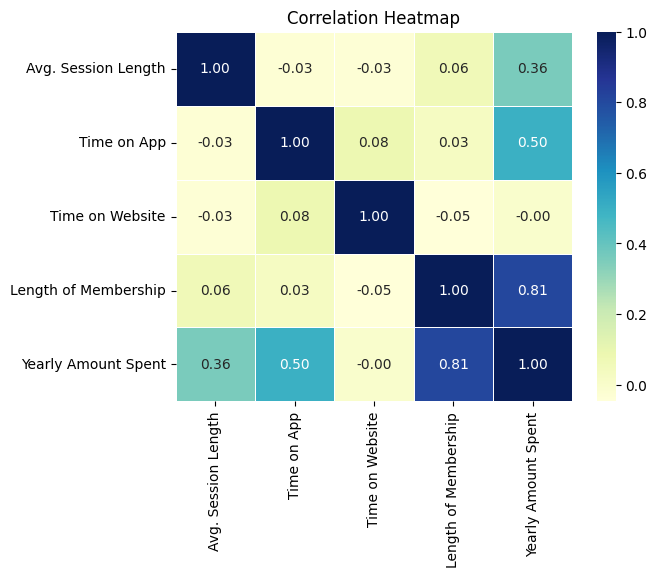

In [7]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for numeric data correlation
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Penjelasan :
melakukan pemisahan data antara numerik dan string dan data numerik ditampilkan dengan diagram heatmap untuk mengetahui korelasi

In [8]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

Penjelasan :

pengambilan data variabel independet (x) dan variabel dependen (y) untuk di lakukan prediksi pada pengeluaran tahunan untuk membership

In [9]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Penjelasan :

Melakukan pembagian data untuk test dan training model dengan skala proporsi 7:3

In [10]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

Penjelasan :

Melakukan pemanggilan library stats model untuk digunakan untuk melakukan training model dengan model linier regresi

In [11]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

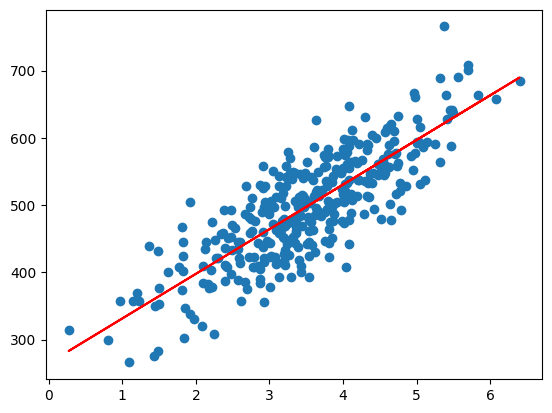

In [12]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Penjelasan :

pada bagian ini melakukan visualisasi data yang telah dilakukan train dengan model regresi dengan menggunakan tabel scatter dari ibrary mathplotlib

In [13]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Penejalasan :

Melakukan prediksi data dari data x yang telah di latih dan dilanjutkan menghitung residual dengan mengurangi hasil y train dengan y train prediksi

<ipython-input-14-d336bf8b039e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


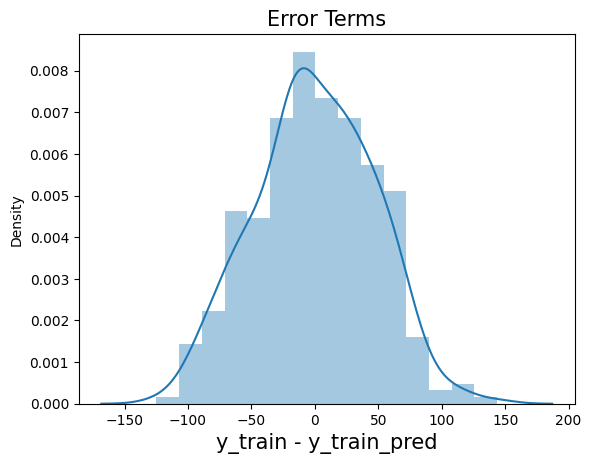

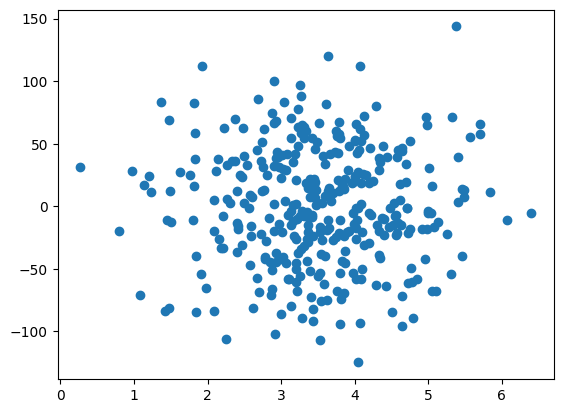

In [14]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Penjelasan :

melakukan visualisasi untuk hasil residula dengan 2 diagram yang berbeda, pertama menggunakan diagram histogram dan yang kedua dengan diagram scartter

In [15]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

Penjelasan :

pada tahapan ini akan melakukan uji data dengan membuat variabel baru x_test_sm untuk menyimpan data uji yang di ambil dari variabel data x_test yang ditambahkan nilai konstanta dengan library statsmodel

pada variabel y_test_prend menyimpan nilai dari hasil prediksi nilai y dengan menggunakan model linier regresi

In [16]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

Penjelasan :

menghitung nilai R-sequere untuk mengetahui kinerja model pada data uji dengan menggunakan library r2_score dari sklearn

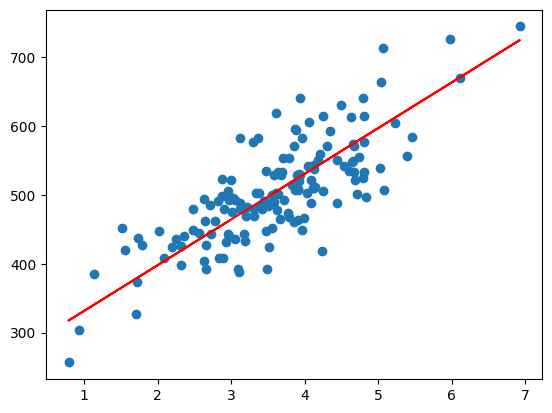

In [17]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Penjelasan :

Melakukan visualisasi hasil dari data uji dan hasil dari prediksi dengan menggunakan diagram scatter dari library matplotlib

#Praktikum 2

In [18]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

Penjelasan :

tahapan awal ini meimport data dan melakukan pemilihan data berdasarkan index dangan menggunakan fungsi iloc

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #membuat object standart scaler untuk variabel x
sc_y = StandardScaler() #membuat object standart scaler untuk variabel y

#melakukan fitting gan transformasi dan Mengubah bentuk array X menjadi array 2 dimensi dengan 1 kolom.
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

Penjelasan :

1. melakukan import fungsi standardscaler dari library sklearn
2. melakukan fitur scaling untuk mengubah skala fitur numerik dalam dataset agar memiliki rentang nilai

In [20]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Penjelasan :

memanggil fungsi SVR dari library sklearn untuk digunakan untuk pembuatan model SVR dengan kernel RBF (Radial basis Function) dan melatih data yang telah di scaled

<ipython-input-21-16b49e598bbf>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


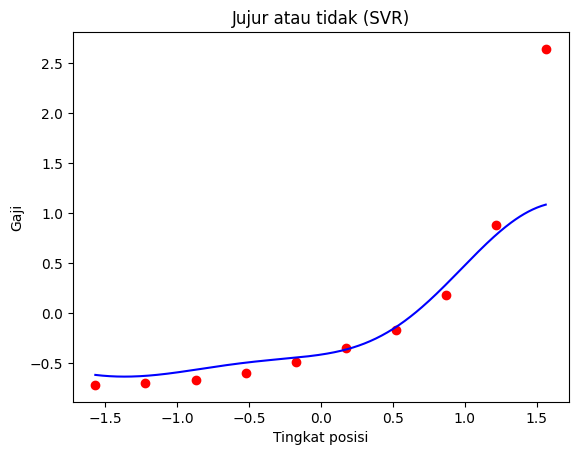

In [21]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

Penjelasan :

pada tahapan ini melakukan visualisasi data hasil prediksi dengan menggunaan model SVR, yang di tampilkan dengan diagram scatter dimana titik merah menunjukan data asli sedangkan garis biru merupakan hasil dari prediksi SVR

In [22]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]]) #membuat array 2d yang berisikan nilai 6.5
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi) # melakukan scaling pada tingkat_posisi_prediksi dengan object sc_x yang telah di fitkan sebelumnya
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi) #melakukan prediksi pada gaji menggunakan model SVR "Regesor" dengan input tingkat_posisi_prediksi
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1)) #megembalikan hasil prediksi (gaji_prediksi) ke skla aslinya

Kode diatas bertujuan untuk memprediksi gaji berdasarkan tingkat posisi dengan menggunakan model SVR.

In [23]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0]) #menampilkan dari hasil prediksi gaji dengan tingkat posisi 6.5

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


In [24]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


Penjelasan kode diatas digunakan untuk melakukan evaluasi dari mode svr dimana apabila  Semakin kecil nilai MAE, MSE, dan RMSE, dan semakin besar nilai R-squared, semakin baik performa model.

#Tugas Praktikum

##1. Import data dan library

In [30]:
# import library yang dibutuhkan
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/content/drive/MyDrive/Polinema/Semester 5/Machine Learning/dataset/insurance.csv') # Fixed the typo in the file name
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



##2. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [31]:
df = pd.DataFrame(data)

# Variabel independen (fitur) dan variabel target
X = df.drop(columns='charges')
y = df['charges']

##3. Melakukan Encoding

In [32]:
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

##4. Melakukan proses scaling

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Standarisasi fitur numerik
        ('cat', OneHotEncoder(), categorical_features)  # One-Hot Encoding fitur kategori
    ])

##5. Buat pipeline untuk model multipel linier regresion

In [34]:
model = Pipeline(steps=[('preprocessor', preprocessor),  # preprocessing (scaling dan encoding)
                        ('regressor', LinearRegression())]) # multiple linear regression


##6. Membagi dataset menjadi data latih (train) dan data uji (test)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##7. Melatih model dan prediksi data uji

In [36]:
#Latih model
model.fit(X_train, y_train)

#Prediksi pada data uji
y_pred = model.predict(X_test)

##8. Viusalisasi perbandingan dari nilai sebenernya dengan nilai prediksi pada data latih dengan diagram scatter

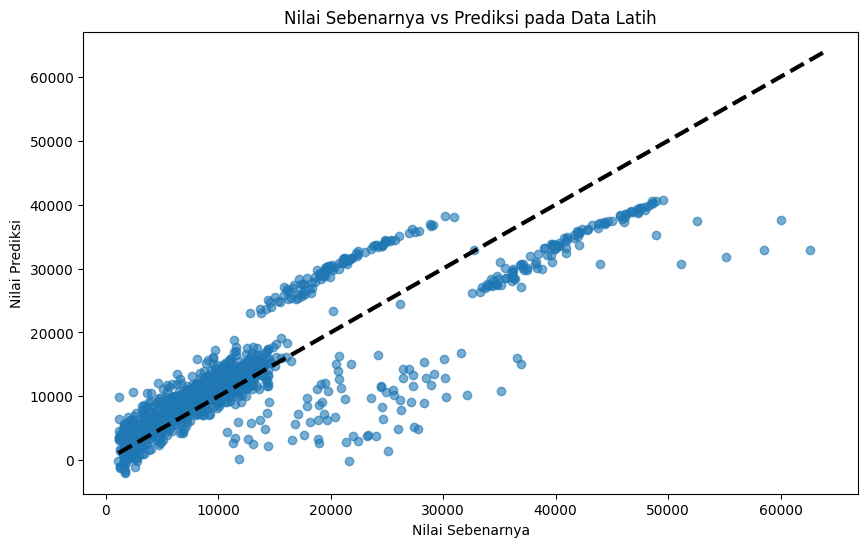

In [42]:
y_train_pred = model.predict(X_train)

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Garis identitas
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs Prediksi pada Data Latih')
plt.show()

##9. Evaluasi model dan menampilkannya

In [37]:
#Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Menampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652
